# 🧠 Stroke Prediction — Data Preprocessing (Beginner Friendly)
Bu notebook başlangıç seviyesindeki öğrenciler için hazırlanmıştır. 
Adım adım veriyi modelleme için hazırlayacağız:
- Veri inceleme
- Missing values (doldurma)
- Outlier tespiti & işleme
- Encoding (kategorik → sayısal)
- Scaling (MinMax / Standard)
- Sampling (Under / Over)
- Basit bir model ile öncesi/sonrası karşılaştırma

In [10]:
# Temel kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn preprocessing ve model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# imbalanced-learn (sampling)
# Eğer yüklü değilse: !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Görseller daha net olsun
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

## 1) Veriyi yükleyelim ve ilk bakalım


In [63]:
df = pd.read_csv("C:\\Users\\Rayiha\\Desktop\\lecture2\\healthcare-dataset-stroke-data.csv")   # dosya adını kontrol et
print("Satır, sütun:", df.shape)
df.head(20)

Satır, sütun: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## 2) Veri tipleri, eksik gözlem sayıları ve özet istatistik

In [16]:
df.info()
print("\nEksik değer sayıları:\n", df.isnull().sum())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Eksik değer sayıları:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_mar

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## 3) Eksik verileri görselleştirelim (hangi sütun nerede eksik?)

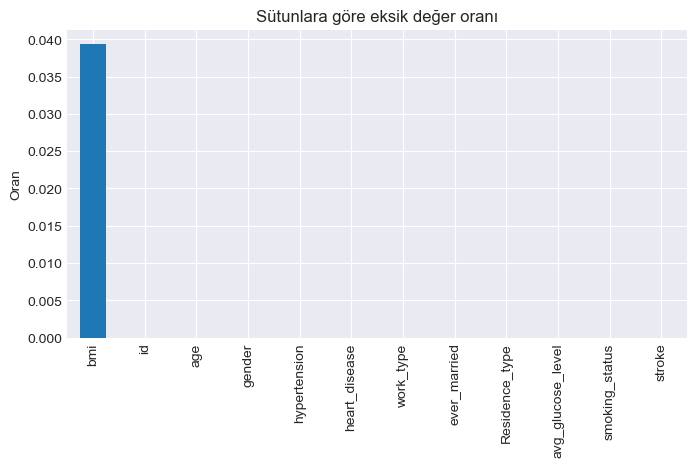

In [19]:
# Basit eksik veri görsellemesi: sütun bazlı eksik değer oranı
missing = df.isnull().mean().sort_values(ascending=False)
missing.plot(kind='bar', figsize=(8,4), title='Sütunlara göre eksik değer oranı')
plt.ylabel('Oran')
plt.show()

## 4) Eksik verileri doldurma (imputation)
### - Sayısal için median veya mean
### - Kategorik için mode
### (Bu veri setinde örnek: 'bmi' eksik olabilir; 'smoking_status' da eksik olabilir)

if missing_rate < 5%:
    Simple imputation (mean/median/mode)

elif 5% ≤ missing_rate ≤ 20%:
    Advanced imputation (KNN, Regression)

elif 20% ≤ missing_rate ≤ 40%:
    Domain knowledge + experimental evaluation

else:
    Drop feature or investigate deeper

In [23]:
# Örnek: bmi için median, smoking_status için mode
print("Eksiklerin önceki hali:")
print(df[['bmi','smoking_status']].isnull().sum())

# Sayısal: median kullanma (outlier varsa median tercih edilir)
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Kategorik: en sık değere (mode) doldurma
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])

print("\nEksiklerin sonraki hali:")
print(df[['bmi','smoking_status']].isnull().sum())

Eksiklerin önceki hali:
bmi               201
smoking_status      0
dtype: int64

Eksiklerin sonraki hali:
bmi               0
smoking_status    0
dtype: int64


In [59]:
df['smoking_status'].value_counts()
df['smoking_status'].value_counts(normalize=True) * 100

smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64

In [61]:
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'unknown') 
# Harf tutarlılığı için

df['smoking_status'].value_counts()

# One-Hot Encoding
df = pd.get_dummies(df, columns=['smoking_status'], drop_first=False)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,avg_glucose_winsor,bmi_log,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,169.3575,3.627004,True,False,False,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,1,169.3575,3.370738,False,True,False,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,105.9200,3.511545,False,True,False,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,169.3575,3.566712,False,False,True,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,169.3575,3.218876,False,True,False,False


## 5) Aykırı değerleri görselleme
### Öne çıkan sayısal sütunlar: 'age', 'avg_glucose_level', 'bmi'

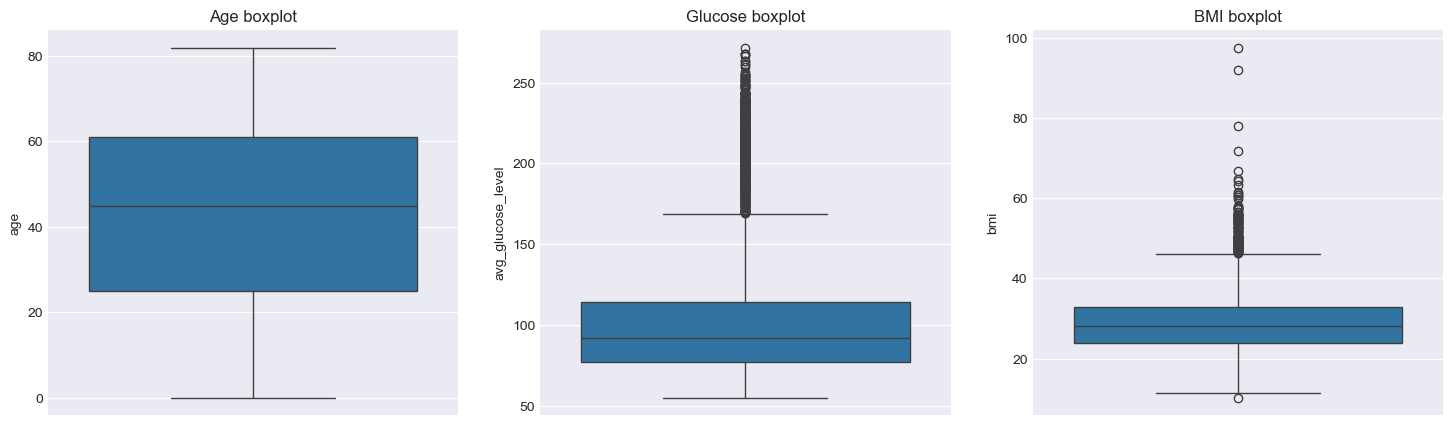

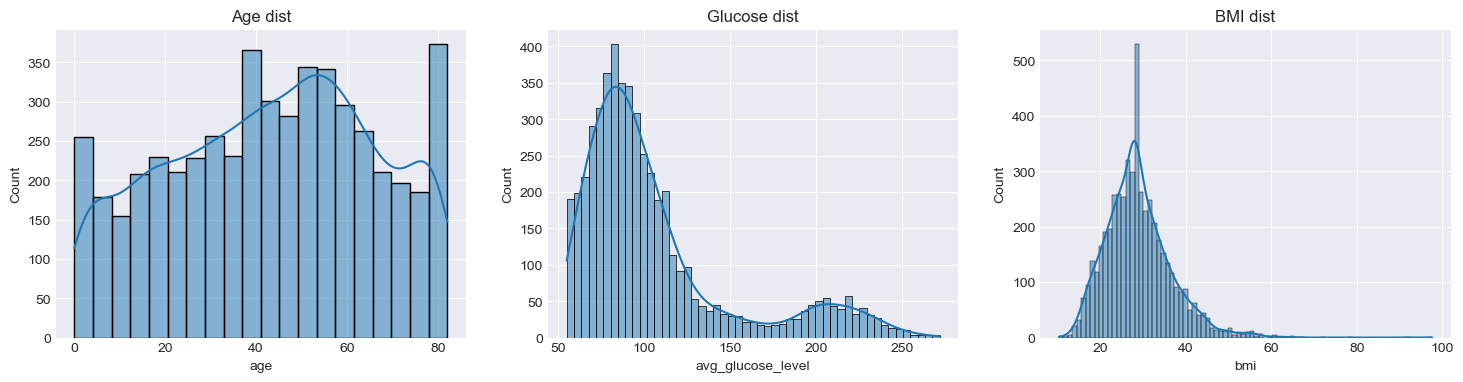

In [26]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.boxplot(y=df['age'], ax=axes[0]); axes[0].set_title('Age boxplot')
sns.boxplot(y=df['avg_glucose_level'], ax=axes[1]); axes[1].set_title('Glucose boxplot')
sns.boxplot(y=df['bmi'], ax=axes[2]); axes[2].set_title('BMI boxplot')
plt.show()

# Ayrıca log dönüşüm isteyip istemediğimizi anlamak için histplot
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.histplot(df['age'], kde=True, ax=axes[0]); axes[0].set_title('Age dist')
sns.histplot(df['avg_glucose_level'], kde=True, ax=axes[1]); axes[1].set_title('Glucose dist')
sns.histplot(df['bmi'], kde=True, ax=axes[2]); axes[2].set_title('BMI dist')
plt.show()

## 6) Outlier handling örnekleri
### Seçenek 1: IQR ile filtreleme (silme)
### Seçenek 2: Winsorization (uçları sınırla)
### Seçenek 3: Log transform (dağılımı normalize etmeye yardımcı)

Glucose limits: 21.977500000000006 169.35750000000002
Glucose outlier sayısı: 627


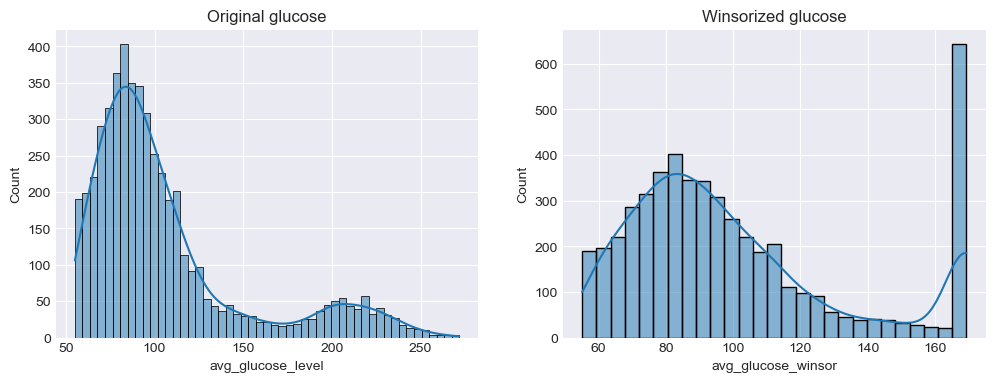

In [29]:
# IQR yöntemi örneği (avg_glucose_level için)
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("Glucose limits:", lower, upper)

# Kaç satır outlier?
outliers = df[(df['avg_glucose_level'] < lower) | (df['avg_glucose_level'] > upper)]
print("Glucose outlier sayısı:", outliers.shape[0])

# Örnek olarak Winsorization (üstü/altı belirli limite çekme)
# basit winsorize: clip ile üst-alt sınır
df['avg_glucose_winsor'] = df['avg_glucose_level'].clip(lower, upper)

# Log transform örneği (area benzeri çarpık dağılımlar için kullanılır)
# burada glucose için değil, ihtiyaca göre kullan. Örnek kullanım:
df['bmi_log'] = np.log1p(df['bmi'])  # log(1 + x) to avoid log(0)

# Göster
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['avg_glucose_level'], ax=axes[0], kde=True).set_title('Original glucose')
sns.histplot(df['avg_glucose_winsor'], ax=axes[1], kde=True).set_title('Winsorized glucose')
plt.show()

## 7) Kategorik sütunlara bakalım
### Ör: gender, ever_married, work_type, Residence_type, smoking_status

gender unique: 3
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
----
ever_married unique: 2
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
----
work_type unique: 5
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
----
Residence_type unique: 2
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
----
smoking_status unique: 4
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
----


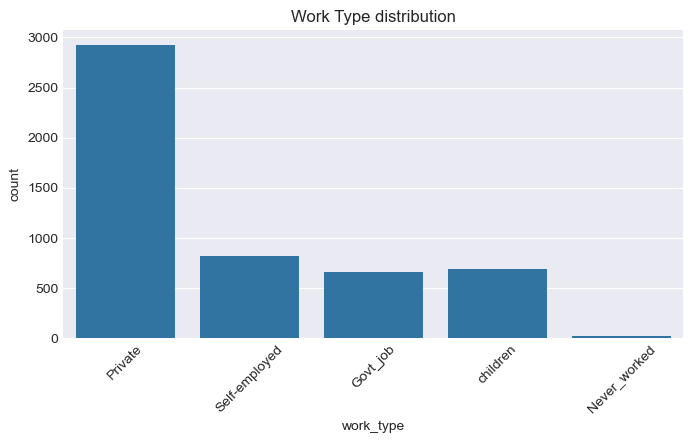

In [33]:
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for c in cat_cols:
    print(c, "unique:", df[c].nunique())
    print(df[c].value_counts())
    print("----")
    
# Görselleştirme örneği (work_type)
plt.figure(figsize=(8,4))
sns.countplot(x='work_type', data=df)
plt.xticks(rotation=45)
plt.title('Work Type distribution')
plt.show()

## 8) Encoding: Kategorik → Sayısal (One-Hot)
### pd.get_dummies kullanacağız. drop_first=True ile dummy trap önlenir.


In [36]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Yeni sütun sayısı:", df_encoded.shape[1])
df_encoded.head()

Yeni sütun sayısı: 20


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,avg_glucose_winsor,bmi_log,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,169.3575,3.627004,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,169.3575,3.370738,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,105.9200,3.511545,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,169.3575,3.566712,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,169.3575,3.218876,False,False,True,False,False,True,False,False,False,True,False


## 9) Sayısal sütunlara bakalım (scaleden önce)

In [39]:
num_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
# hedef sütun 'stroke' hariç diğer sayısal sütunlar
num_cols.remove('stroke')  # hedefi çıkardık
print("Sayısal sütunlar:", num_cols)
df_encoded[num_cols].describe().T

Sayısal sütunlar: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'avg_glucose_winsor', 'bmi_log']


,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.000000,17741.250000,36932.000000,54682.000000,72940.000000
age,5110.0,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,5110.0,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.0,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.0,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,5110.0,28.862035,7.699562,10.300000,23.800000,28.100000,32.800000,97.600000
avg_glucose_winsor,5110.0,100.996204,33.214738,55.120000,77.245000,91.885000,114.090000,169.357500
bmi_log,5110.0,3.365068,0.250511,2.424803,3.210844,3.370738,3.520461,4.591071


## 10) Scaling: MinMaxScaler ve StandardScaler örnekleri
### Genelde MinMax: (0-1 aralığı), StandardScaler: mean=0, std=1

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Kopya oluşturup iki farklı scaling uygulayalım
df_minmax = df_encoded.copy()
df_std = df_encoded.copy()

minmax = MinMaxScaler()
std = StandardScaler()

df_minmax[num_cols] = minmax.fit_transform(df_minmax[num_cols])
df_std[num_cols] = std.fit_transform(df_std[num_cols])

# Hızlı kontrol
print("MinMax - age min/max:", df_minmax['age'].min(), df_minmax['age'].max())
print("Std - age mean/std:", round(df_std['age'].mean(),3), round(df_std['age'].std(),3))

MinMax - age min/max: 0.0 1.0
Std - age mean/std: 0.0 1.0


## 11) Hedef dağılımı (dengesizlik kontrolü)

Original class distribution:
stroke
0    4861
1     249
Name: count, dtype: int64


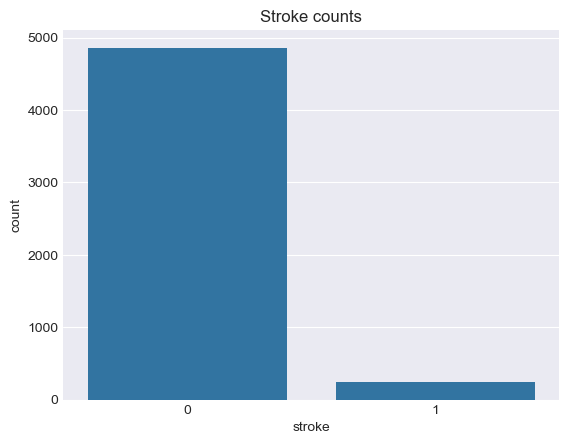

In [45]:
print("Original class distribution:")
print(df['stroke'].value_counts())
sns.countplot(x='stroke', data=df)
plt.title('Stroke counts')
plt.show()

## 12) Sampling örnekleri: Over (SMOTE) ve Under (RandomUnderSampler)
### Not: SMOTE sayısal verilerle iyi çalışır; kategorik dummy sütunların olduğu data ile dikkatli kullan.

In [48]:
# Önce X,y hazırla (örnek için MinMax scaled veriyi kullanalım)
X = df_minmax.drop('stroke', axis=1)
y = df_minmax['stroke']

print("Önceden:", y.value_counts())

# Over-sampling (RandomOverSampler)
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print("RandomOverSampler sonrası:", y_ros.value_counts())

# SMOTE (sentetik örnek üretme)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print("SMOTE sonrası:", y_sm.value_counts())

# Under-sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print("RandomUnderSampler sonrası:", y_rus.value_counts())

Önceden: stroke
0    4861
1     249
Name: count, dtype: int64
RandomOverSampler sonrası: stroke
1    4861
0    4861
Name: count, dtype: int64
SMOTE sonrası: stroke
1    4861
0    4861
Name: count, dtype: int64
RandomUnderSampler sonrası: stroke
0    249
1    249
Name: count, dtype: int64


## 15) Özet & İpuçları

- Her zaman önce veri yapısını incele: `info()`, `describe()`, `head()`
- Eksikleri doldur: sayısal için median/mean, kategorik için mode
- Outlier bul: boxplot ve IQR ile; silme ya da winsorize et
- Encoding: `get_dummies()` ile one-hot; ordinal ise label encoding
- Scaling: model tipine göre seç (MinMax veya Standard)
- Sampling: dengesiz sınıf varsa SMOTE/oversampling veya undersampling uygula
- Son olarak: modellemeden önce tüm preprocessing adımlarını aynı sırayla uygula

### Alıştırma Önerileri
1. Aynı pipelinenı titanic veri seti üzerinde uygula.
2. SMOTE yerine RandomOverSampler dene; sonuçları karşılaştır.
3. Outlier temizleme yerine log dönüşüm dene; sonuç fark etti mi?
